In [1]:
import pandas as pd, numpy as np, seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix , accuracy_score ,classification_report
from sklearn.preprocessing import StandardScaler
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Final dataset Attrition.csv')

In [3]:
df.count()

Age                        1470
Attrition                  1470
BusinessTravel             1470
Department                 1470
DistanceFromHome           1470
Gender                     1470
JobInvolvement             1470
JobLevel                   1470
JobRole                    1470
JobSatisfaction            1470
MaritalStatus              1470
MonthlyIncome              1470
NumCompaniesWorked         1470
OverTime                   1470
PercentSalaryHike          1470
PerformanceRating          1470
StockOptionLevel           1470
TotalWorkingYears          1470
TrainingTimesLastYear      1470
YearsAtCompany             1470
YearsSinceLastPromotion    1470
YearsWithCurrManager       1470
Higher_Education           1470
Date_of_Hire               1470
Date_of_termination           0
Status_of_leaving          1470
Mode_of_work               1470
Leaves                     1470
Absenteeism                1470
Work_accident              1470
Source_of_Hire             1470
Job_mode

In [4]:
df.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
Department                    0
DistanceFromHome              0
Gender                        0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
NumCompaniesWorked            0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
YearsAtCompany                0
YearsSinceLastPromotion       0
YearsWithCurrManager          0
Higher_Education              0
Date_of_Hire                  0
Date_of_termination        1470
Status_of_leaving             0
Mode_of_work                  0
Leaves                        0
Absenteeism                   0
Work_accident                 0
Source_of_Hire                0
Job_mode

### Since the columns 'Date_of_termination' and 'Unnamed: 32' are null for all rows, we can drop them. Date_of_Hire can also be dropped as its a redundant column. The same can be derived from the column YearsAtCompany

In [5]:
df.drop(['Unnamed: 32', 'Date_of_termination', 'Date_of_Hire'], axis = 1, inplace = True)

### 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   BusinessTravel           1470 non-null   object
 3   Department               1470 non-null   object
 4   DistanceFromHome         1470 non-null   int64 
 5   Gender                   1470 non-null   object
 6   JobInvolvement           1470 non-null   int64 
 7   JobLevel                 1470 non-null   int64 
 8   JobRole                  1470 non-null   object
 9   JobSatisfaction          1470 non-null   int64 
 10  MaritalStatus            1470 non-null   object
 11  MonthlyIncome            1470 non-null   int64 
 12  NumCompaniesWorked       1470 non-null   int64 
 13  OverTime                 1470 non-null   object
 14  PercentSalaryHike        1470 non-null  

In [7]:
df.nunique()

Age                          43
Attrition                     2
BusinessTravel                3
Department                    3
DistanceFromHome             29
Gender                        2
JobInvolvement                4
JobLevel                      5
JobRole                       9
JobSatisfaction               4
MaritalStatus                 3
MonthlyIncome              1349
NumCompaniesWorked           10
OverTime                      2
PercentSalaryHike            15
PerformanceRating             2
StockOptionLevel              4
TotalWorkingYears            40
TrainingTimesLastYear         7
YearsAtCompany               37
YearsSinceLastPromotion      16
YearsWithCurrManager         18
Higher_Education              4
Status_of_leaving             5
Mode_of_work                  2
Leaves                        6
Absenteeism                   4
Work_accident                 2
Source_of_Hire                4
Job_mode                      3
dtype: int64

### from the unique function, it seems like most of the columns are categorical with less than 10 distinct values

In [8]:
# check if there are any duplicate rows which can be dropped
df.duplicated().sum()

0

In [9]:
#Features and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Research & Development' 'Sales' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
Gender : ['Male' 'Female']
Male      882
Female    588
Name: Gender, dtype: int64
_________________________________________________________________
JobRole : ['Laboratory Technician' 'Research Scientist' 'Research Director'
 'Sales Representative' 'Sales Executive' 'Manager'
 'Manufacturing Director' 'Healthcare Representative' 'Human Resources']
Sales 

### from the above data, it seems like there is no similar categorical values. The categorial data seems to be handled properly. 

### Univariate Analysis

In [10]:
df.describe()

,Age,DistanceFromHome,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Leaves,Absenteeism
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.729932,2.063946,2.728571,6502.931293,2.693197,15.209524,3.153741,0.793878,11.279592,2.799320,7.008163,2.187755,4.123129,2.568707,1.525170
std,9.135373,8.106864,0.711561,1.106940,1.102846,4707.956783,2.498009,3.659938,0.360824,0.852077,7.780782,1.289271,6.126525,3.222430,3.568136,1.716171,1.097856
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,12.000000,3.000000,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,1.000000,1.000000
50%,36.000000,7.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,14.000000,3.000000,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,2.000000
75%,43.000000,14.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,18.000000,3.000000,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,2.000000
max,60.000000,29.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,25.000000,4.000000,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,5.000000,3.000000


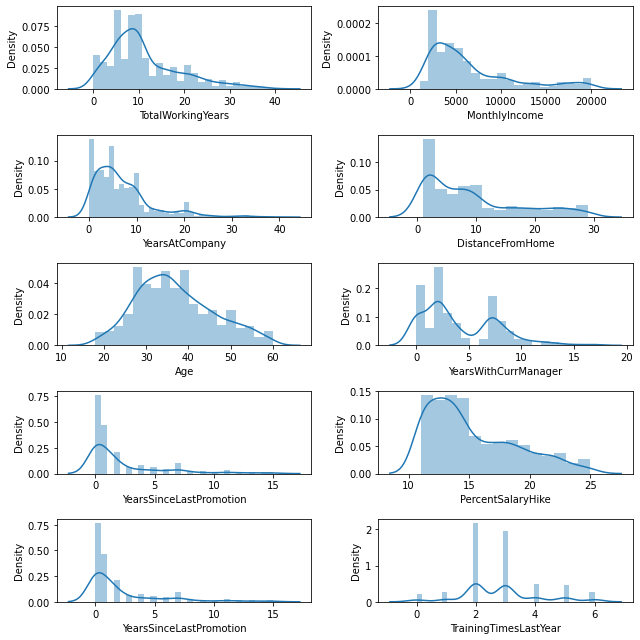

In [11]:
fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['Age'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

<AxesSubplot:>

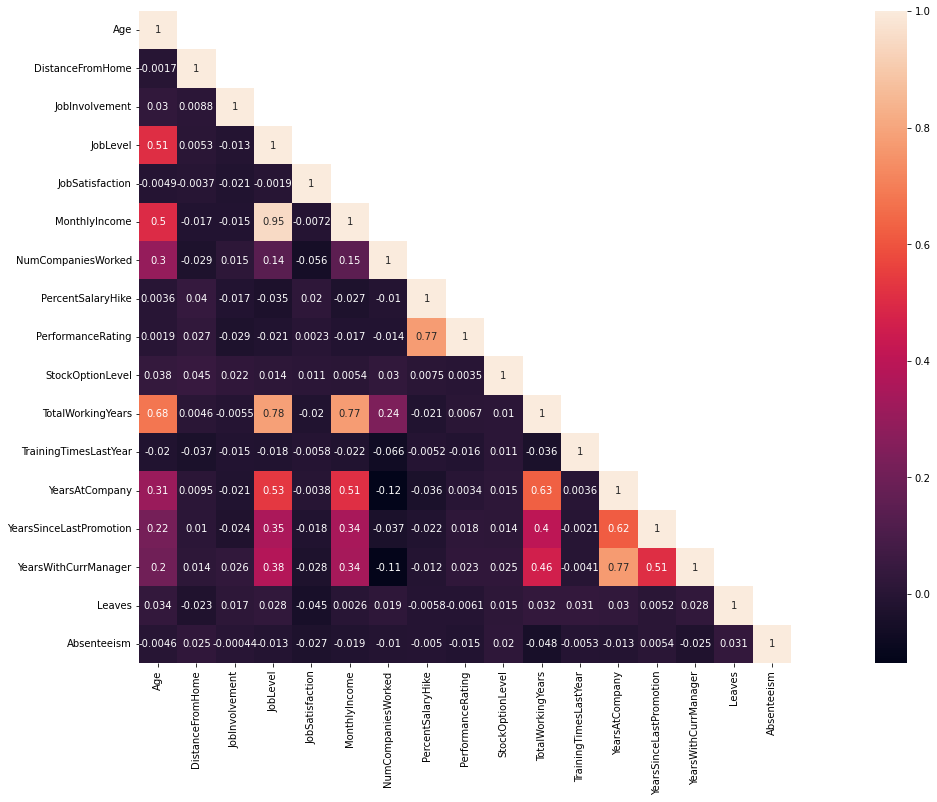

In [12]:
#corelation matrix.
cor_mat= df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

### Observations

JobLevel is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

MonthlyIncome is very strongly related to joblevel as senior employees earn more.

PerformanceRating is highly related to PercentSalaryHike.

Also note that TotalWorkingYears is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

YearsWithCurrManager is highly related to YearsAtCompany.

YearsAtCompany is related to YearsInCurrentRole.

In [13]:
# Lets see the percentage of employees who have left the company

Text(0.5, 1.0, 'Employee attrition counts')

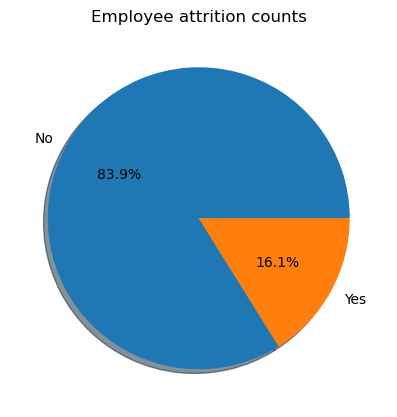

In [14]:
# create figure and axes
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
# Visualizing target variable classes and its distribution among the dataset
def func(pct):
  return "{:1.1f}%".format(pct)
plt.pie(df['Attrition'].value_counts(), labels=['No','Yes'], autopct=lambda pct: func(pct), shadow=True)
plt.title('Employee attrition counts')

### seems like 16.1% of the employees have left the company while 83.9% employees are still working. 

####  Lets dig deeper into the eployees who have left the company and see if we can find patterns

In [15]:

df_attrition = df.query("Attrition=='Yes'")

Text(0.5, 1.0, 'Attrition')

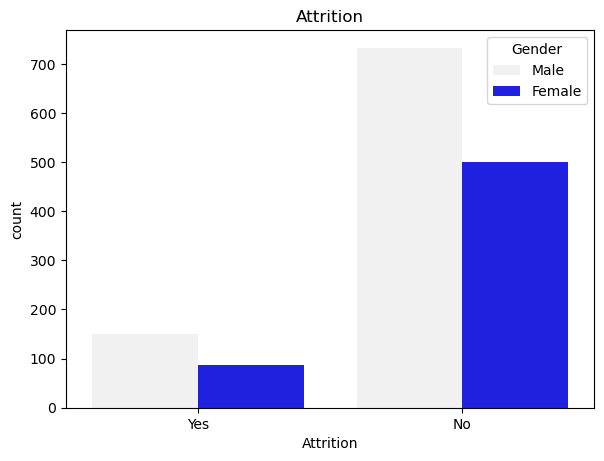

In [16]:
fig, ax = plt.subplots(figsize=(15, 5), dpi=100)
plt.subplot(1,2,1)
sns.countplot(df['Attrition'] ,color ='b' ,hue =df['Gender'])
plt.title('Attrition by Gender')
plt.title('Attrition')

<AxesSubplot:xlabel='count', ylabel='JobRole'>

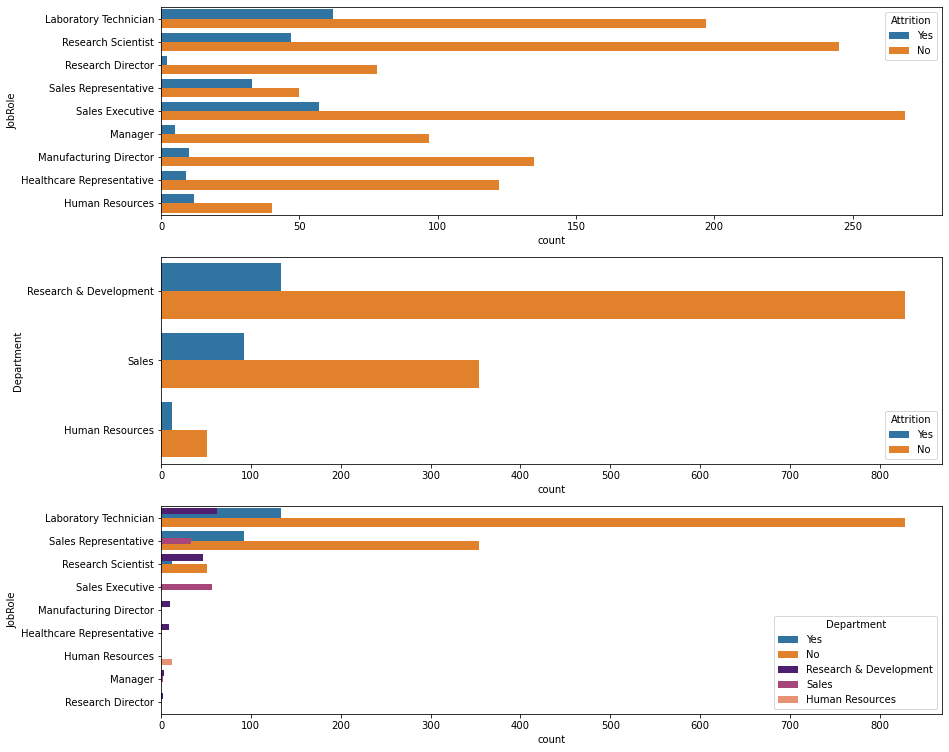

In [17]:
plt.figure(figsize = (14 , 13))
plt.subplot(3,1,1)
sns.countplot(y= 'JobRole' ,data = df ,hue =df['Attrition'])
plt.subplot(3,1,2)
sns.countplot(y= 'Department',data = df,hue =df['Attrition'])
plt.subplot(3,1,3)
sns.countplot(y= 'Department',data = df,hue =df['Attrition'])
sns.countplot(y= 'JobRole',data = df_attrition,palette='magma',hue =df['Department'])

### Observations:

### 1. From the above figures, it seems like Research and Development department saw the highest attrition rates when compared to sales and human resources.. 
### 2. the maximum attrition was in the job role categories Research Scientist, Laboratory Technician and Sales executive. 

<AxesSubplot:xlabel='YearsSinceLastPromotion', ylabel='count'>

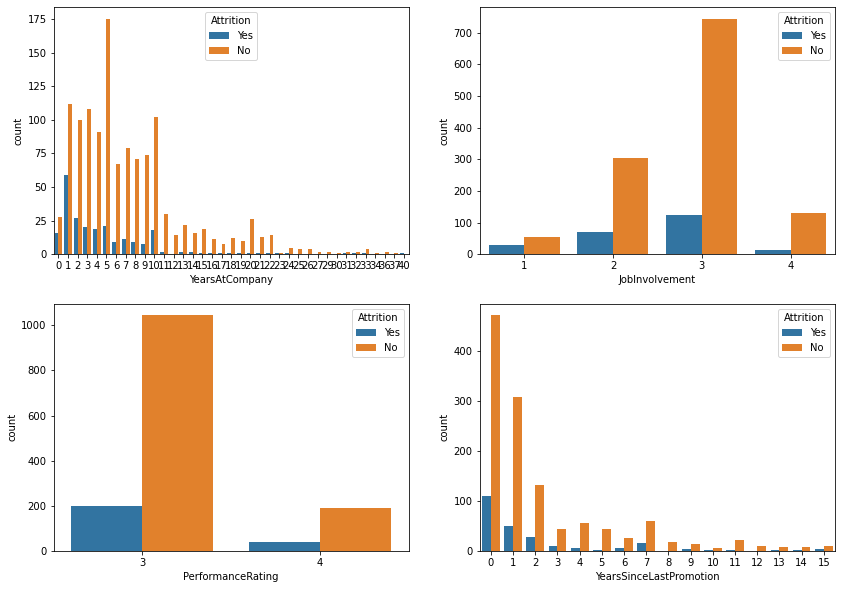

In [18]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['YearsAtCompany'] ,hue =df['Attrition'])
plt.subplot(2,2,2)
sns.countplot(df['JobInvolvement'] ,hue =df['Attrition'])
plt.subplot(2,2,3)
sns.countplot(df['PerformanceRating'] ,hue =df['Attrition'])
plt.subplot(2,2,4)
sns.countplot(df['YearsSinceLastPromotion'] ,hue =df['Attrition'])


### Observations
1. YearsAtCompany : data shows that the people who have been in the company a for more time are less likely to leave the company
2. JobInvolvement: People who have a high involvement in their current roles tend to leave the company.
3. PerformanceRating: lower performance rating is also a cause for employees to leave
4. YearsSinceLastPromotion: People who got promoted recently tend to leave the organization sooner

<AxesSubplot:xlabel='BusinessTravel', ylabel='count'>

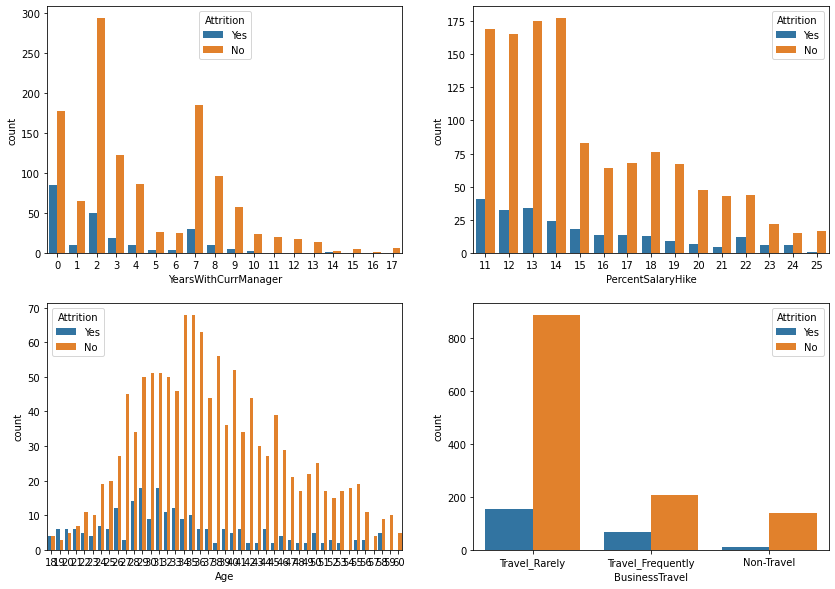

In [19]:
plt.figure(figsize =(14 ,10))

plt.subplot(2,2,1)
sns.countplot(df['YearsWithCurrManager'] ,hue =df['Attrition'])
plt.subplot(2,2,2)
sns.countplot(df['PercentSalaryHike'] ,hue =df['Attrition'])
plt.subplot(2,2,3)
sns.countplot(df['Age'], hue=df['Attrition'])
plt.subplot(2,2,4)
sns.countplot(df['BusinessTravel'], hue=df['Attrition'])



### Observations
1. YearsWithCurrManager : Usually people leave when there is a manager change. This might be because of working style of difference of opinion.
2. PercentSalaryHike: People who get lower salary hikes tend to change organizations
3. Age: people in the age group of 28-34 have a higher chance of leaving the organization.
4. BusinessTravel: People who get to travel rarely are seen to be leaving the org.

<AxesSubplot:xlabel='TrainingTimesLastYear', ylabel='count'>

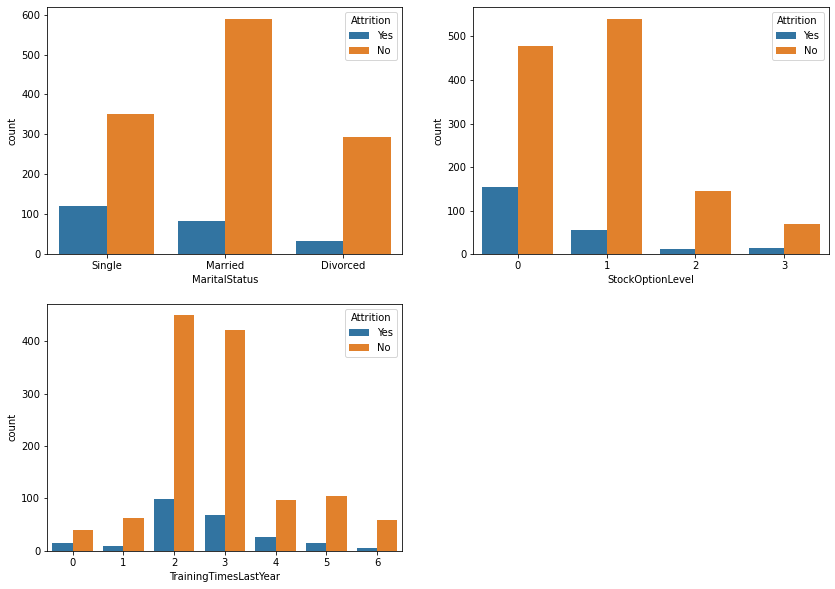

In [20]:
plt.figure(figsize =(14 ,10))

plt.subplot(2,2,1)
sns.countplot(df['MaritalStatus'] ,hue =df['Attrition'])
plt.subplot(2,2,2)
sns.countplot(df['StockOptionLevel'] ,hue =df['Attrition'])
plt.subplot(2,2,3)
sns.countplot(df['TrainingTimesLastYear'], hue=df['Attrition'])



### Observations
1. MaritalStatus : Single people are more likely to leave the organization. This is because they are more likely to take risks.
2. StockOptionLevel: People who do not get stock options have a higher chance of leaving the organization
3. TrainingTimesLastYear: people attending 2-3 trainings tend to leave the organization

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

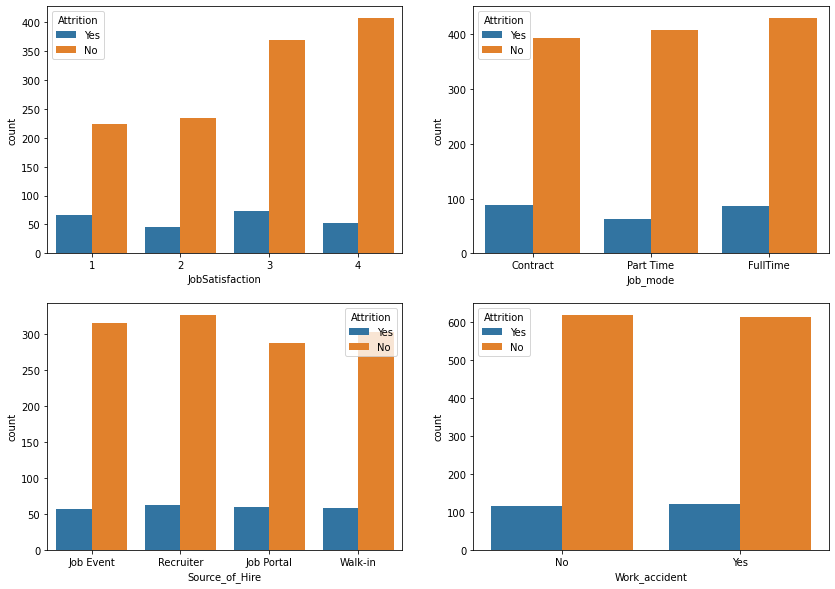

In [21]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['JobSatisfaction'] ,hue =df['Attrition'])
plt.subplot(2,2,2)
sns.countplot(df['Job_mode'], hue=df['Attrition'])
plt.subplot(2,2,3)
sns.countplot(df['Source_of_Hire'], hue=df['Attrition'])
plt.subplot(2,2,4)
sns.countplot(df['Work_accident'], hue=df['Attrition'])


<AxesSubplot:xlabel='Status_of_leaving', ylabel='count'>

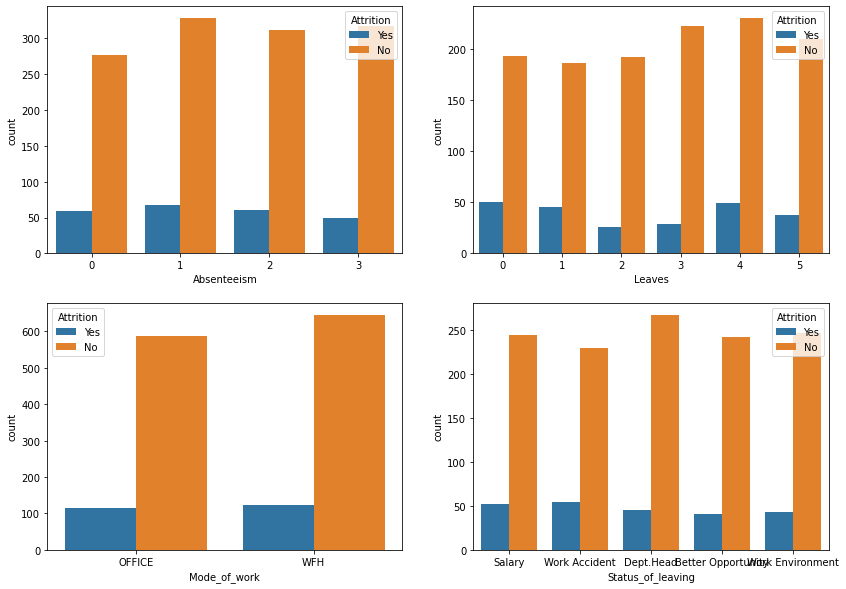

In [22]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['Absenteeism'], hue=df['Attrition'])
plt.subplot(2,2,2)
sns.countplot(df['Leaves'], hue=df['Attrition'])
plt.subplot(2,2,3)
sns.countplot(df['Mode_of_work'], hue=df['Attrition'])
plt.subplot(2,2,4)
sns.countplot(df['Status_of_leaving'], hue=df['Attrition'])


<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

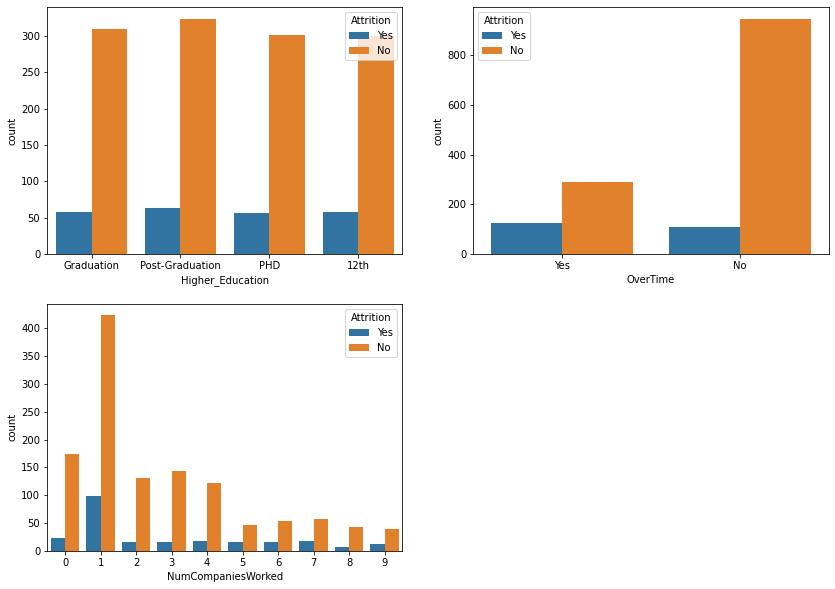

In [23]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['Higher_Education'], hue=df['Attrition'])
plt.subplot(2,2,2)
sns.countplot(df['OverTime'], hue=df['Attrition'])
plt.subplot(2,2,3)
sns.countplot(df['NumCompaniesWorked'], hue=df['Attrition'])

### From the above figures we see that 
<pre>
<b>
Status_of_leaving,
'Higher_Education
OverTime
NumCompaniesWorked
JobSatisfaction
Job_mode
Source_of_Hire
Work_accident
Absenteeism
Leaves
Mode_of_work
    </b>
</pre>
#### have little to no importance on Attrition. We can DROP these columns

In [24]:
# Removing features with little to no importance
df.drop(['Status_of_leaving','Higher_Education','OverTime','NumCompaniesWorked','JobSatisfaction', 'Job_mode', 'Source_of_Hire','Work_accident','Absenteeism','Leaves','Mode_of_work'], axis = 1, inplace = True)

### Binary Features Encoding


In [25]:
df['Gender'].replace({'Male':1 ,'Female':0} ,inplace = True)

### Ordinal Features Encoding

In [26]:
OE = OrdinalEncoder()
columns_OE = ['BusinessTravel', 'JobInvolvement','PerformanceRating']
df[columns_OE] = OE.fit_transform(df[columns_OE])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      1470 non-null   int64  
 1   Attrition                1470 non-null   object 
 2   BusinessTravel           1470 non-null   float64
 3   Department               1470 non-null   object 
 4   DistanceFromHome         1470 non-null   int64  
 5   Gender                   1470 non-null   int64  
 6   JobInvolvement           1470 non-null   float64
 7   JobLevel                 1470 non-null   int64  
 8   JobRole                  1470 non-null   object 
 9   MaritalStatus            1470 non-null   object 
 10  MonthlyIncome            1470 non-null   int64  
 11  PercentSalaryHike        1470 non-null   int64  
 12  PerformanceRating        1470 non-null   float64
 13  StockOptionLevel         1470 non-null   int64  
 14  TotalWorkingYears       

### Categorical Features Encoding

In [28]:

le = LabelEncoder()
for col in df.select_dtypes('object').columns:
    df[col] = le.fit_transform(df[col])

In [29]:
### Numerical Features Scaling

Scaler = MinMaxScaler()
Scaling_Cols = ['TrainingTimesLastYear','YearsAtCompany','TotalWorkingYears',
               'YearsSinceLastPromotion','YearsWithCurrManager',
               'PercentSalaryHike','Age','DistanceFromHome',
               'MonthlyIncome']
df[Scaling_Cols] = Scaler.fit_transform(df[Scaling_Cols])

([<matplotlib.patches.Wedge at 0x15b4318bd60>,
 [Text(-0.9618916732177651, 0.5336332157899547, 'No'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes')],
 [Text(-0.5246681853915082, 0.29107266315815705, '83.9%'),
  Text(0.5246681853915082, -0.2910726631581571, '16.1%')])

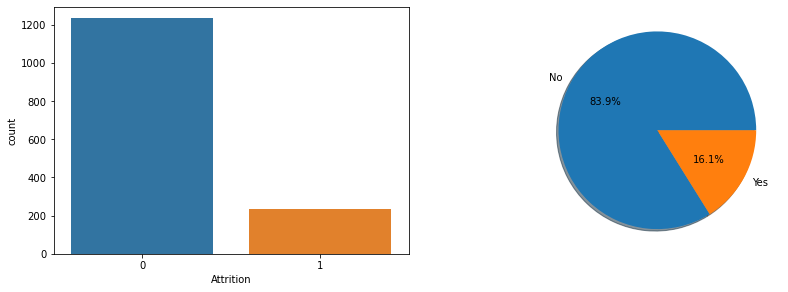

In [30]:
plt.figure(figsize =(14 ,10))
plt.subplot(2,2,1)
sns.countplot(df['Attrition'])
plt.subplot(2,2,2)
plt.pie(df['Attrition'].value_counts(), labels=['No','Yes'], autopct=lambda pct: func(pct), shadow=True)

### We see here that there is a huge class imbalance in the dataset. This would prevent us from building a good model as majority of the predictions might come as 0. We will use SMOTE to reduce the class imbalance in the dataset

In [31]:
# splitting features into x and y
x = df.drop('Attrition' ,axis =1)
y = df['Attrition']

In [32]:
smote = SMOTE(sampling_strategy='minority')
x_new ,y_new = smote.fit_resample(x ,y)

print(x_new.shape ,y_new.shape)

(2466, 18) (2466,)


<AxesSubplot:xlabel='Attrition', ylabel='count'>

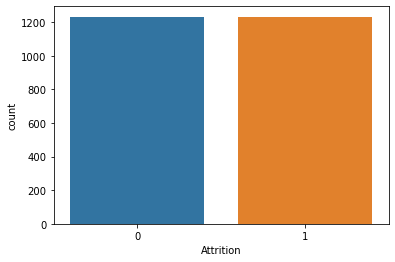

In [33]:
# After balancing the class
y_new.value_counts()
sns.countplot(y_new)

In [34]:
# Splitting the data into train and test sets
x_train , x_test , y_train ,y_test = train_test_split(x_new , y_new, test_size=0.3 , random_state= 5)

In [35]:
#scaling the data 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Random Forest Classifier

In [36]:
def get_stats(y_test, ytest_pred, y_train, ytrain_pred):
    print(classification_report(y_test , ytest_pred))
    print(classification_report(y_train , ytrain_pred))
    sns.heatmap(confusion_matrix(y_test ,ytest_pred) ,annot = True)

In [47]:
rf_model = RandomForestClassifier()
rf_score = cross_val_score(rf_model , x_train , y_train ,cv = KFold(n_splits = 5) ,scoring = 'neg_mean_squared_error')
rf_score.mean()

-0.10252994889838318

In [38]:
rf_model.fit(x_train ,y_train)
rf_ytest_pred = rf_model.predict(x_test)
rf_ytrain_pred = rf_model.predict(x_train)
accuracy_score(y_test ,rf_ytest_pred)

0.9054054054054054

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       374
           1       0.91      0.90      0.90       366

    accuracy                           0.91       740
   macro avg       0.91      0.91      0.91       740
weighted avg       0.91      0.91      0.91       740

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       867

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



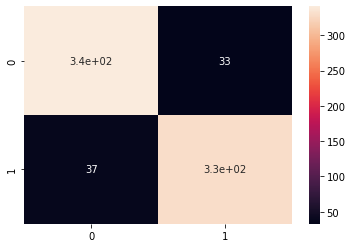

In [39]:
get_stats(y_test, rf_ytest_pred, y_train, rf_ytrain_pred)

# Decision Tree Classifier

In [40]:
dt_model = DecisionTreeClassifier()
dt_score = cross_val_score(dt_model , x_train , y_train ,cv =  KFold(n_splits = 5) ,scoring = 'neg_mean_squared_error')
dt_score.mean()

-0.21725224093155732

In [41]:
dt_model.fit(x_train ,y_train)
dt_ytest_pred = dt_model.predict(x_test)
dt_ytrain_pred = dt_model.predict(x_train)
accuracy_score(y_test ,dt_ytest_pred)

0.8067567567567567

              precision    recall  f1-score   support

           0       0.84      0.76      0.80       374
           1       0.78      0.86      0.81       366

    accuracy                           0.81       740
   macro avg       0.81      0.81      0.81       740
weighted avg       0.81      0.81      0.81       740

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       859
           1       1.00      1.00      1.00       867

    accuracy                           1.00      1726
   macro avg       1.00      1.00      1.00      1726
weighted avg       1.00      1.00      1.00      1726



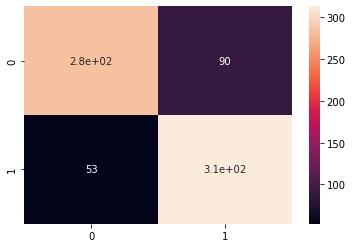

In [42]:
get_stats(y_test, dt_ytest_pred, y_train, dt_ytrain_pred)

### check the errors from both the models

Text(0.5, 1.0, 'Neg Mean square error')

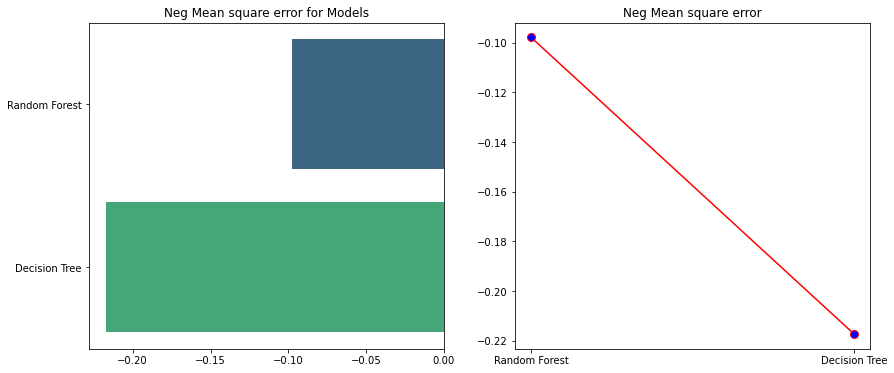

In [43]:
plt.figure(figsize = (14 , 6))
plt.subplot(1,2,1)
models_list = ['Random Forest' ,'Decision Tree']
model_mean_list = [rf_score.mean(), dt_score.mean()]
plt.title('Neg Mean square error for Models')
sns.barplot(model_mean_list,models_list,palette="viridis")

plt.subplot(1,2,2)
plt.plot(models_list ,model_mean_list,marker = 'o' ,color = 'r',mfc ='b' ,ms =8 )
plt.title('Neg Mean square error')

### OBSERVATIONS

### We obtained less negative mean sq error for RFC, thus we will go with Random Forest Classifier

In [44]:
rf_model.fit(x_train ,y_train)
ytest_pred = rf_model.predict(x_test)
ytrain_pred = rf_model.predict(x_train)
accuracy_score(y_test ,ytest_pred)

0.9094594594594595

# Feature Selection

Feature: 0, Score: 0.07563593100400115
Feature: 1, Score: 0.04145297254483355
Feature: 2, Score: 0.016384423545870424
Feature: 3, Score: 0.07988991218057696
Feature: 4, Score: 0.013304641020772091
Feature: 5, Score: 0.04412969950277495
Feature: 6, Score: 0.03983769832726391
Feature: 7, Score: 0.039556522565301476
Feature: 8, Score: 0.02347489835046492
Feature: 9, Score: 0.08520112037110525
Feature: 10, Score: 0.06373392726042289
Feature: 11, Score: 0.011602303885207754
Feature: 12, Score: 0.07136141182532839
Feature: 13, Score: 0.07676910299672948
Feature: 14, Score: 0.07732695332082025
Feature: 15, Score: 0.08330258089505217
Feature: 16, Score: 0.07017743363654123
Feature: 17, Score: 0.0868584667669333


<Figure size 1008x720 with 0 Axes>

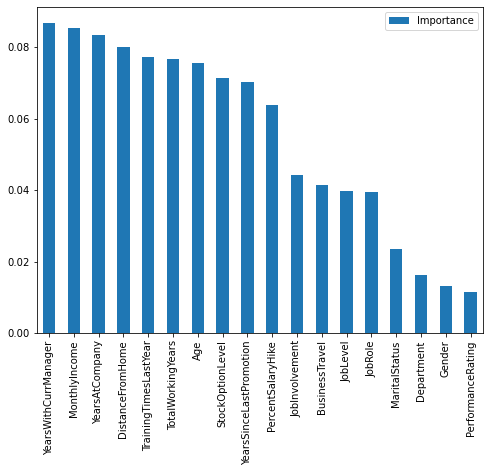

In [45]:
features = np.array(df.columns)
plt.figure(figsize = (14 ,10))    

# summarize feature importance
for i,v in enumerate(rf_model.feature_importances_):
    print('Feature: {}, Score: {}'.format(i,v))

feat_importances = pd.DataFrame(rf_model.feature_importances_, index=np.array(x.columns), columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', figsize=(8,6))

plt.xticks(rotation=90)
plt.show()